In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from keras.applications.vgg16 import preprocess_input
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/DR_50_70/Train_70'
test_dir = '/content/drive/MyDrive/DR_50_70/Test_70'

Mounted at /content/drive


In [3]:
# Load VGG16 model for feature extraction
model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [4]:
# Function to extract features from an image
def extract_features_VGGnet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [5]:

# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_VGGnet(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

1/1 [==============================] - 1s 784ms/step


In [6]:
# Load images and extract features
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_VGGnet(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 0s 459ms/step


Training Decision Tree (gini)...
True Positives: 442
True Negatives: 2467
False Positives: 233
False Negatives: 233
Accuracy: 0.8619259259259259
Precision: 0.6673060254122098
Specificity: 0.9137037037037037
Sensitivity: 0.654814814814815
F1 Score: 0.6579397688709767
Recall: 0.654814814814815



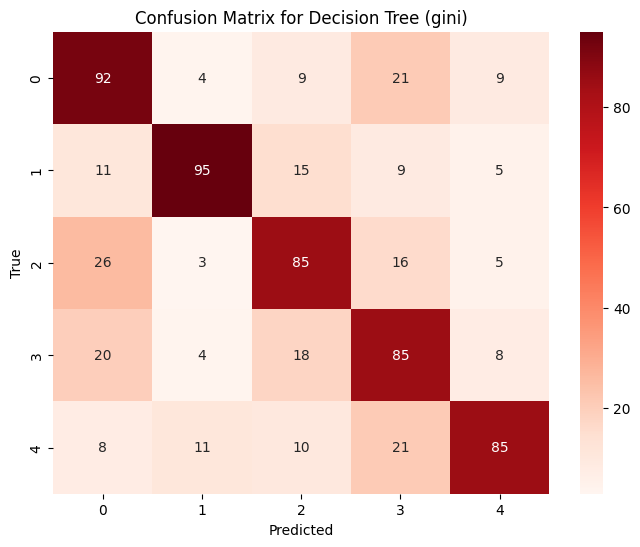

Training Decision Tree (entropy)...
True Positives: 440
True Negatives: 2465
False Positives: 235
False Negatives: 235
Accuracy: 0.8607407407407407
Precision: 0.6642553135876442
Specificity: 0.912962962962963
Sensitivity: 0.6518518518518518
F1 Score: 0.6560672850793725
Recall: 0.6518518518518518



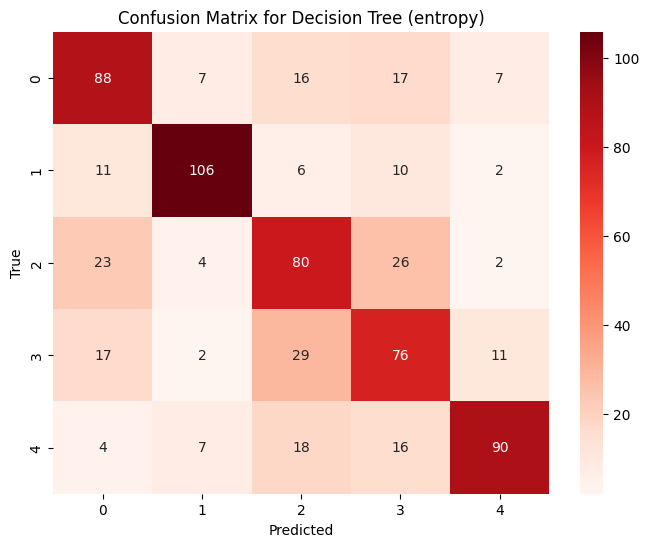

Training Extra Trees...
True Positives: 606
True Negatives: 2631
False Positives: 69
False Negatives: 69
Accuracy: 0.9591111111111111
Precision: 0.9049338679021993
Specificity: 0.9744444444444444
Sensitivity: 0.8977777777777778
F1 Score: 0.898831564709727
Recall: 0.8977777777777778



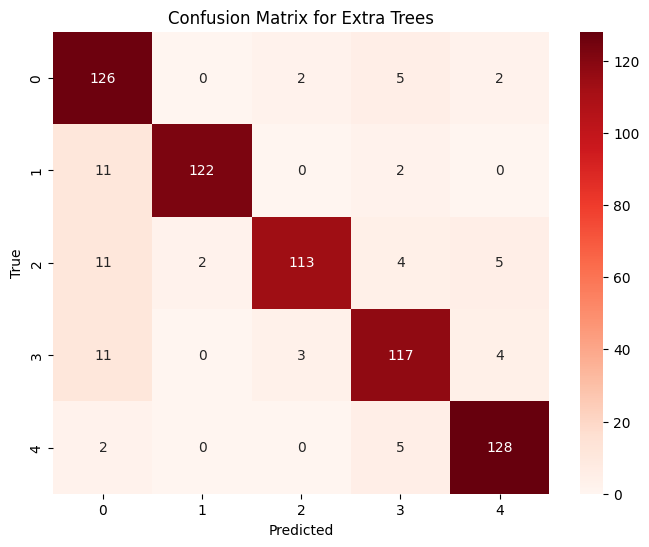

Training Decision Tree (gini)...
True Positives: 440
True Negatives: 2465
False Positives: 235
False Negatives: 235
Accuracy: 0.8607407407407407
Precision: 0.6667102139709309
Specificity: 0.912962962962963
Sensitivity: 0.6518518518518519
F1 Score: 0.6553283729142019
Recall: 0.6518518518518519



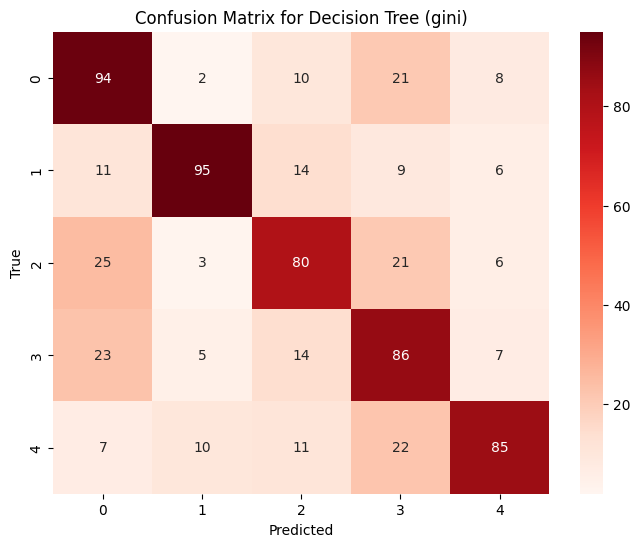

Training Decision Tree (entropy)...
True Positives: 435
True Negatives: 2460
False Positives: 240
False Negatives: 240
Accuracy: 0.8577777777777778
Precision: 0.6536250228310647
Specificity: 0.9111111111111111
Sensitivity: 0.6444444444444445
F1 Score: 0.6478533188305848
Recall: 0.6444444444444445



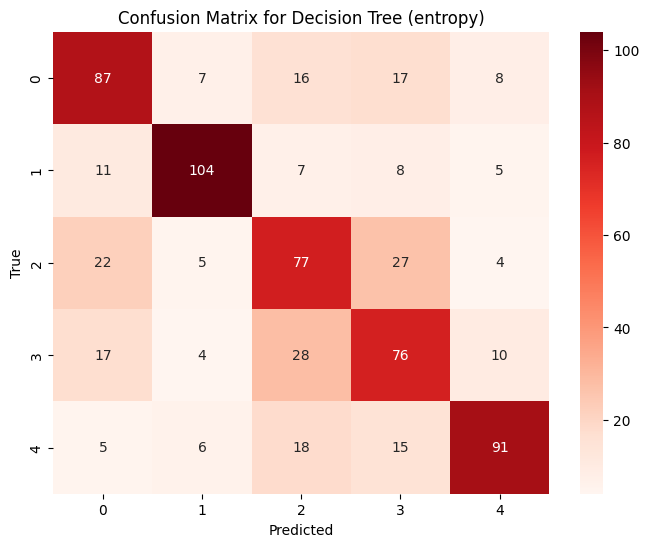

Training Extra Trees...
True Positives: 603
True Negatives: 2628
False Positives: 72
False Negatives: 72
Accuracy: 0.9573333333333334
Precision: 0.8996476605972191
Specificity: 0.9733333333333334
Sensitivity: 0.8933333333333333
F1 Score: 0.8944303813471869
Recall: 0.8933333333333333



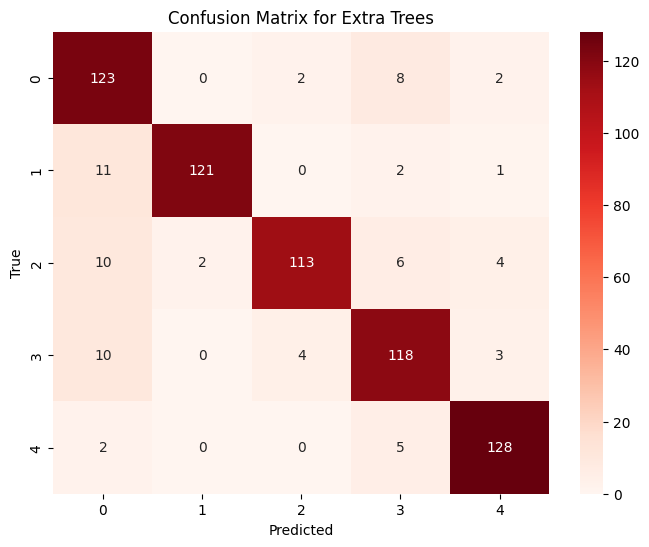

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# List of classifiers to try
classifiers = [
    DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=10, min_samples_leaf=5),
    DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10, min_samples_leaf=5),
    ExtraTreesClassifier(n_estimators=500)
]

classifier_names = [
    'Decision Tree (gini)',
    'Decision Tree (entropy)',
    'Extra Trees'
]

x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

for clf, name in zip(classifiers, classifier_names):
    print(f"\033[1mTraining {name}...\033[0m")

    # Train classifier
    clf.fit(x_train_flat, y_train)

    # Predict on test set
    y_pred = clf.predict(x_test_flat)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute TP, TN, FP, FN for each class
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    num_classes = cm.shape[0]
    TN = []
    for i in range(num_classes):
        temp = np.delete(cm, i, 0)   # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))

    # Compute overall TP, TN, FP, FN
    overall_TP = np.sum(TP)
    overall_TN = np.sum(TN)
    overall_FP = np.sum(FP)
    overall_FN = np.sum(FN)

    # Compute accuracy, precision, specificity, sensitivity, F1-score, recall
    accuracy = (overall_TP + overall_TN) / (overall_TP + overall_TN + overall_FP + overall_FN)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    specificity = overall_TN / (overall_TN + overall_FP)

    # Print performance metrics
    print(f'True Positives: {overall_TP}')
    print(f'True Negatives: {overall_TN}')
    print(f'False Positives: {overall_FP}')
    print(f'False Negatives: {overall_FN}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Specificity: {specificity}')
    print(f'Sensitivity: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Recall: {recall}\n')

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
